Using TensorFlow backend.
C:\Users\YANG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YANG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YANG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YANG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                600       
__________________________________

episode: 94   score: 272.0   memory length: 2000   epsilon: 0.06792542297010071
episode: 95   score: 185.0   memory length: 2000   epsilon: 0.05639143697332418
episode: 96   score: 134.0   memory length: 2000   epsilon: 0.04926676792865426
episode: 97   score: 439.0   memory length: 2000   epsilon: 0.03172260849632522
episode: 98   score: 173.0   memory length: 2000   epsilon: 0.02665408895124881
episode: 99   score: 206.0   memory length: 2000   epsilon: 0.021668053813878495
episode: 100   score: 257.0   memory length: 2000   epsilon: 0.016738474222410496
episode: 101   score: 500.0   memory length: 2000   epsilon: 0.010149858337571439
episode: 102   score: 211.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 103   score: 265.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 104   score: 220.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 105   score: 313.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 106   score: 330.0

episode: 195   score: 10.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 196   score: 8.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 197   score: 8.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 198   score: 7.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 199   score: 9.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 200   score: 7.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 201   score: 8.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 202   score: 14.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 203   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 204   score: 405.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 205   score: 415.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 206   score: 382.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 207   score: 416.0   

SystemExit: 

C:\Users\YANG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


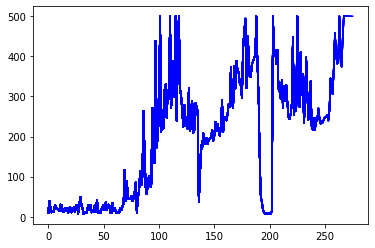

In [1]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

EPISODES = 300

# 카트폴 예제에서의 DQN 에이전트
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.render = False
        self.load_model = False

        # 상태와 행동의 크기 정의
        self.state_size = state_size
        self.action_size = action_size

        # DQN 하이퍼파라미터
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000

        # 리플레이 메모리, 최대 크기 2000
        self.memory = deque(maxlen=2000)

        # 모델과 타깃 모델 생성
        self.model = self.build_model()
        self.target_model = self.build_model()

        # 타깃 모델 초기화
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_dqn_trained.h5")

    # 상태가 입력, 큐함수가 출력인 인공신경망 생성
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # 타깃 모델을 모델의 가중치로 업데이트
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # 입실론 탐욕 정책으로 행동 선택
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # 샘플 <s, a, r, s'>을 리플레이 메모리에 저장
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # 리플레이 메모리에서 무작위로 추출한 배치로 모델 학습
    def train_model(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        # 메모리에서 배치 크기만큼 무작위로 샘플 추출
        mini_batch = random.sample(self.memory, self.batch_size)

        states = np.zeros((self.batch_size, self.state_size))
        next_states = np.zeros((self.batch_size, self.state_size))
        actions, rewards, dones = [], [], []

        for i in range(self.batch_size):
            states[i] = mini_batch[i][0]
            actions.append(mini_batch[i][1])
            rewards.append(mini_batch[i][2])
            next_states[i] = mini_batch[i][3]
            dones.append(mini_batch[i][4])

        # 현재 상태에 대한 모델의 큐함수
        # 다음 상태에 대한 타깃 모델의 큐함수
        target = self.model.predict(states)
        target_val = self.target_model.predict(next_states)

        # 벨만 최적 방정식을 이용한 업데이트 타깃
        for i in range(self.batch_size):
            if dones[i]:
                target[i][actions[i]] = rewards[i]
            else:
                target[i][actions[i]] = rewards[i] + self.discount_factor * (
                    np.amax(target_val[i]))

        self.model.fit(states, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)


if __name__ == "__main__":
    # CartPole-v1 환경, 최대 타임스텝 수가 500
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # DQN 에이전트 생성
    agent = DQNAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        # env 초기화
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # 현재 상태로 행동을 선택
            action = agent.get_action(state)
            # 선택한 행동으로 환경에서 한 타임스텝 진행
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # 에피소드가 중간에 끝나면 -100 보상
            reward = reward if not done or score == 499 else -100

            # 리플레이 메모리에 샘플 <s, a, r, s'> 저장
            agent.append_sample(state, action, reward, next_state, done)
            # 매 타임스텝마다 학습
            if len(agent.memory) >= agent.train_start:
                agent.train_model()

            score += reward
            state = next_state

            if done:
                # 각 에피소드마다 타깃 모델을 모델의 가중치로 업데이트
                agent.update_target_model()

                score = score if score == 500 else score + 100
                # 에피소드마다 학습 결과 출력
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_dqn.png")
                print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)

                # 이전 10개 에피소드의 점수 평균이 490보다 크면 학습 중단
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_dqn.h5")
                    sys.exit()
